In [ ]:
%load_ext autoreload
%autoreload 2

# Data transforms

> Additional transforms for fastai

In [ ]:
#| default_exp data.transforms

In [ ]:
#|hide
from nbdev.showdoc import *

In [ ]:
#|export
from fastai.vision.all import *
import polvo as pv
import fastpolvo as fpv

In [ ]:
#|export
class FlipVert(RandTransform):
    order = 30
    @delegates(RandTransform.__init__)
    def __init__(self, p=0.5, **kwargs):
        "Batch transform for flipping images vertically"
        super().__init__(p=p, **kwargs)
        
    def encodes(self, x:TensorImage): return torch.flip(x, [2]) # (BS, C, H, W)
    def encodes(self, x:TensorMask): return torch.flip(x, [1]) # only 3 channels (BS, H, W)

In [ ]:
data_dir = pv.datasets.snacks_tiny()
image_files = pv.get_image_files(data_dir)
image = PILImage.create(image_files[0])
timage = ToTensor()(image)

  0%|          | 0/438252 [00:00<?, ?B/s]

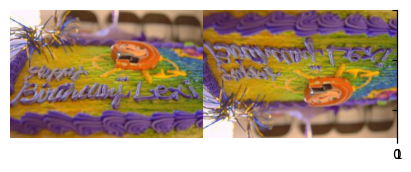

(<Figure size 500x800 with 6 Axes>,
 <mpl_toolkits.axes_grid1.axes_grid.ImageGrid>)

In [ ]:
flipped = FlipVert(p=1).encodes(timage[None, ...])[0]
pv.plot_grid([partial(show_image, image), flipped.show], figsize=(5,8))

In [ ]:
#|export
class AlignOrientation(Transform):
    @delegates(Transform.__init__)
    def __init__(self, orientation='vertical', **kwargs):
        "Keep all images in same orientation"
        self.orientation = orientation
        super().__init__(**kwargs)
        
    def encodes(self, x:Image.Image):
        w, h = x.size
        if w>h and self.orientation=='vertical': x = x.rotate(90, expand=True)
        elif h>w and self.orientation=='horizontal': x = x.rotate(90, expand=True)
        return x

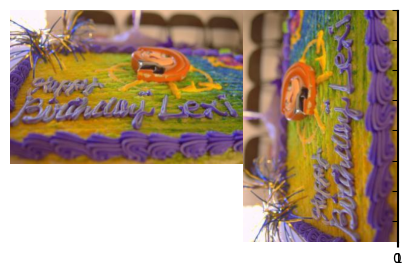

(<Figure size 500x800 with 6 Axes>,
 <mpl_toolkits.axes_grid1.axes_grid.ImageGrid>)

In [ ]:
pv.image_grid([image, AlignOrientation()(image)], figsize=(5,8))

In [ ]:
#|hide
import nbdev; nbdev.nbdev_export()